# A Data-Driven Exploration of Movie Success Factors
### Melaina Herbst 


For my final project, I am analyzing movie data.I have collected a movie dataset from TMBd. I decided to analyze movie data because I have always had an interest in movies. Not only the movie itself, but the process of making movies, all of the elements that go into film-making, and the movie industry as a whole.

Data source: TMBd 
https://www.kaggle.com/datasets/juzershakir/tmdb-movies-dataset 



The dataset includes 10,866 movies released in the years 1966-2015. This dataset has 21 different details about each movie that are shown as columns. This data can be used to predict future trends and outcomes in the Movie industry as well. 


Movie data can be analyzed in many different ways. Throughout my analysis, my goal is to identify trends within the data that can be applied to future movie releases. Below are questions I hope to answer with my data analysis. 


#### How many films were released per year? 

#### Do higher-budget films generally receive better ratings?

#### Is there a correlation between the duration of a movie and its rating? 

#### Are there trends in ratings based on the month or season of a movie's release?


In this dataset, I have cleaned the data to eliminate any rows and columns that are unnecessary for my analysis. The dataset started with 10,866 rows and 21 columns. Each row in this dataset represents one movie and each column represents one characteristic about a movie. Not all columns are necessary for my analysis, so I have removed 7 of the columns that do not hold any importance. This has brought my column number down to 7. 


Throughout my project, I ran into a few errors when dealing with duplicate movie titles. To eliminate the errors, I removed all duplicate movie titles in the dataset. To prevent additional errors in my analysis, I removed all rows where there was a value of "0" in the budget and revenue column. These incomplete values would have altered my dataset and affected the outcome. Before the removal of unwanted data, the dataset contained 10,866 movies. After removing all unnecessary columns and rows, my data set contains 3,618 movies. The total amount of rows removed is 7,248. 


Rows: 3,618
Columns: 14

In [71]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import requests 
import base64
import urllib 
from datetime import datetime

To import my data, I did so through a csv file from tmbd. 

In [72]:
tmbd_movie_data = pd.read_csv('tmdb_movies_data.csv')

In [73]:
tmbd_movie_data.drop_duplicates(subset="original_title", 
                     keep=False, inplace=True)

In the line above, it shows the process of removing duplicate movie titles from the dataframe. Throughout this project, I ran into a few issues as I was working through my code. One main problem stemmed from having duplicate movies in my dataset. It took a while to figure out the issue, but as soon as I figured out the issue  and added the above code, the problem went away. After removing movie duplicates, the total amount of rows is 10,294. In this dataset, there was 572 duplicate movies. 

In [74]:
tmbd_movie_data.shape

(10294, 21)

In [75]:
tmbd_movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [76]:
clean_all_movies_df = tmbd_movie_data.drop(columns= ['imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'budget_adj', 'revenue_adj'])

Throughout this dataset, there were many unnecessary columns that would not be important to my project. To make the data easier to read and work with I removed seven columns. Many rows had insufficent values for these columns, which would have negatively impacted my analysis. After removing unwanted columns, there is a total of 14. 

In [77]:
clean_all_movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


To ensure I had eliminated all duplicates in my dataframe, I used the functions below to see each row and each column. 

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [78]:
budget_drop_df = clean_all_movies_df[clean_all_movies_df.budget != 0]

In [79]:
budget_drop_df.shape

(4868, 14)

After removing all rows in my dataset with a budget of zero, my data set has 4,868 columns. There were 5,426 movies that had a budget of zero or an insignificant value.

In [80]:
budg_rev_drop_df = budget_drop_df[budget_drop_df.revenue != 0]

In [81]:
budg_rev_drop_df.shape

(3618, 14)

After removing all rows with a revenue of zero, my data set has 3,618 rows. There was 1,250 movies with a revenue of zero or an insignificant value. This was the last removal of data throughout my analysis. The final data shape is 3,618 rows and 14 columns. 

The two dataframes above show the removal of each movie with a budget and/or revenue of zero. By these rows having zero values, it would affect the accuracy of my results. Removing these columns not only helped clean my dataset, it also condensed it quite a bit as well. Eliminating even more rows that are unecessary for my analysis made it easier to work with the data. 

In [82]:
name_group = budg_rev_drop_df.groupby('original_title').sum()

In [83]:
name_group.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
original_title,,,,,,,,,,,,,
(500) Days of Summer,19913,3.244139,7500000,60722734,Joseph Gordon-Levitt|Zooey Deschanel|ChloÃ« Gr...,Marc Webb,95,Comedy|Drama|Romance,Fox Searchlight Pictures|Watermark|Dune Entert...,7/17/2009,1778,7.3,2009
10 Things I Hate About You,4951,1.769152,16000000,53478166,Julia Stiles|Heath Ledger|Joseph Gordon-Levitt...,Gil Junger,97,Comedy|Romance|Drama,Mad Chance|Jaret Entertainment|Touchstone Pict...,3/30/1999,947,7.2,1999
"10,000 BC",7840,1.841839,105000000,266000000,Steven Strait|Camilla Belle|Cliff Curtis|Natha...,Roland Emmerich,109,Adventure|Action|Drama|Fantasy,Centropolis Entertainment|Legendary Pictures|W...,2/22/2008,586,5.2,2008
101 Dalmatians,11674,1.419885,54000000,320689294,Glenn Close|Jeff Daniels|Joely Richardson|Joan...,Stephen Herek,103,Comedy|Family,Walt Disney Pictures|Great Oaks Entertainment,11/17/1996,367,5.5,1996
102 Dalmatians,10481,0.410235,85000000,183611771,Glenn Close|Ioan Gruffudd|Alice Evans|Tim McIn...,Kevin Lima,100,Comedy|Family,Walt Disney Pictures|Cruella Productions,10/7/2000,150,5.0,2000


The dataframe above shows grouping the data by Movie Title.

In [84]:
popular_sorted_df = name_group.sort_values(by ='popularity', ascending= False)

The above code shows sorting the dataframe from most popular to least popular while group by movie title.  

In [85]:
popular_sorted_df['timestamp'] = [pd.Timestamp(x) for x in popular_sorted_df['release_date']]

In the code above, it shows adding the timestamp column with the proper format of the date the movie releases. This part was another big issue for me. It took many attempts to get this line to properly work. There were a few underlyig issues that I had to fix before I figured out what the issue was, but once again, after I figured it out, the rest went smoothly.

In [86]:
popular_sorted_df.head()

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,timestamp
original_title,,,,,,,,,,,,,,
Jurassic World,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,2015-06-09
Mad Max: Fury Road,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,2015-05-13
Interstellar,157336,24.949134,165000000,621752480,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/2014,6498,8.0,2014,2014-11-05
Guardians of the Galaxy,118340,14.311205,170000000,773312399,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/2014,5612,7.9,2014,2014-07-30
Insurgent,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,2015-03-18


In [87]:
popular_sorted_df.shape

(3618, 14)

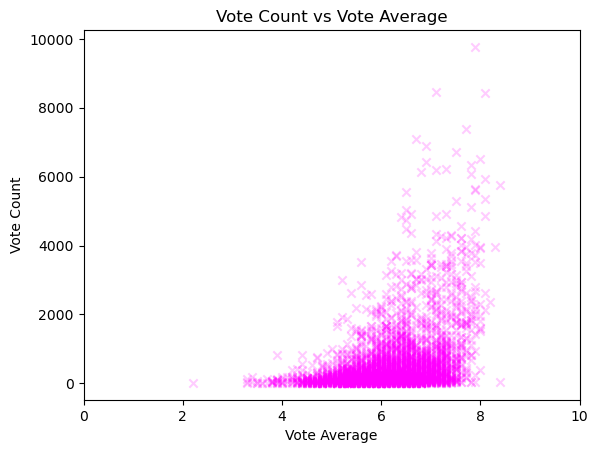

In [88]:
fig1, ax1 = plt.subplots()
ax1.scatter(x = popular_sorted_df['vote_average'], 
            y = popular_sorted_df['vote_count'],
           color = 'magenta', 
           marker = 'x', 
           alpha = .2)

ax1.set_title('Vote Count vs Vote Average')
ax1.set_xlabel('Vote Average')
ax1.set_ylabel('Vote Count')
plt.xticks(np.arange(0, 12, 2))


plt.show()


The scatterplot above shows vote average vs vote count. I wanted to see how many counted votes went into the vote average for each movie. The scatterplot includes 3,618 movies. The vote counts range from 0-10,00. The vote average ranges on a scale from 0-10. The majority of movies have a vote average between 5 and 7 with the average number of votes being from 0-1500. 


In this scatter plot, the vote average is on the x axis and the vote count is on the y axis. I changed the color, shape, and alpha value to make the points stand stand out. By changing the alpha value, it allows the reader to get a gauge on how many points are on the graph. Many of the points are layered together, making it hard to see where each point is. The alpha value helps solve this issue. 

#### How many movies were released each year?

In [89]:
year = popular_sorted_df.groupby('release_year').count()['id']


In [90]:
year.head()

release_year
1960    3
1961    9
1962    7
1963    6
1964    7
Name: id, dtype: int64

In the line above, it shows grouping the dataset together by the release year and counting how many movies were released each year. 

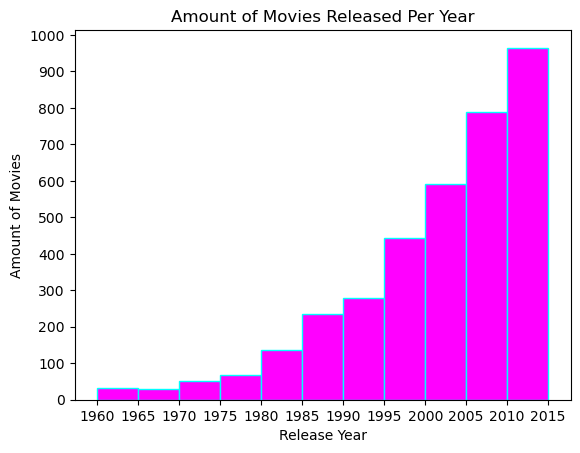

In [91]:
fig2, ax2 = plt.subplots()
plt.hist(year.index, bins=np.arange(1960, 2016, 5), 
         weights = year, edgecolor ='cyan', color = 'magenta')

plt.xlabel('Release Year')
plt.ylabel('Amount of Movies')
plt.title('Amount of Movies Released Per Year')


plt.xticks(np.arange(1960, 2016, 5))
plt.yticks(np.arange(0, 1100, 100))


plt.show()

The dataframe above shows the histogram of amount of movies released per year. The years range from 1960-2015 and the amount of movies ranges from 0-1000. I changed the intervals of the release years to 5 and the amount of movies to 100 to make the graph easier to read. 

#### Is there a correlation between the duration of a movie and its rating? 

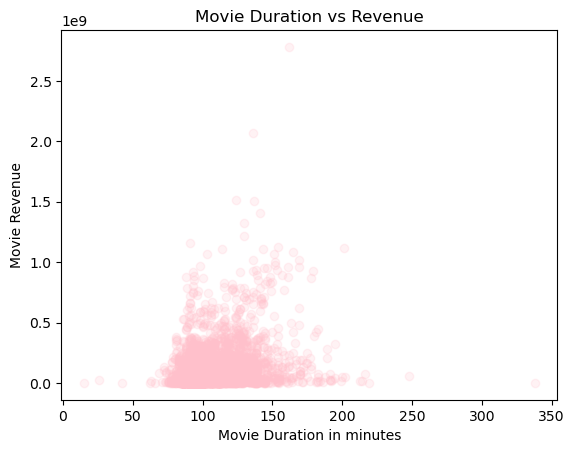

In [92]:
fig3, ax3 = plt.subplots()
ax3.scatter(x = popular_sorted_df['runtime'], 
            y = popular_sorted_df['revenue'],
           color = 'pink', 
           alpha = .2)


ax3.set_xlabel('Movie Duration in minutes')
ax3.set_ylabel('Movie Revenue')



ax3.set_title('Movie Duration vs Revenue')
plt.show()

The scatterplot above shows Movie Duration vs Revenue. Most movies have a run time of 75-150 minutes. The average revenue is from 0-5billion. My question was asking if there is a correlation between runtime of a movie and the revenue the movie brings in. Below shows the test to prove if there is a corrleation or not. 

In [93]:
result = stats.pearsonr(popular_sorted_df['revenue'], popular_sorted_df['runtime'])

In [94]:
result

PearsonRResult(statistic=0.2407977399442327, pvalue=6.870010510417473e-49)

In [95]:
round(result.pvalue,3)

0.0

I completed a test to see if the corrleation between revenue and runtime was postive. The pvalue result of "0.0" shows that there is a strong corrleation between revenue and runtime of a movie. 

#### Do higher-budget films generally receive better ratings?

In [96]:
median_budget = popular_sorted_df['budget'].median()

In [97]:
median_budget

23800000.0

To test my question "Do higher-budget films generally receive better ratings?", I found the mean of the budget for the whole dataset.

In [98]:
lower_budget_df = popular_sorted_df[popular_sorted_df['budget'] <= median_budget]
upper_budget_df = popular_sorted_df[popular_sorted_df['budget'] > median_budget]

Above, I created variables for the upper budget and lower budget. The upper budget movies have a budget median above 23800000. The lower budget movies have a budget median of 23800000 or below. 

In [99]:
lower_budget_df.shape

(1809, 14)

In [100]:
upper_budget_df.shape

(1809, 14)

Each dataframe of upper and lower movies contains 1,809 movies. 

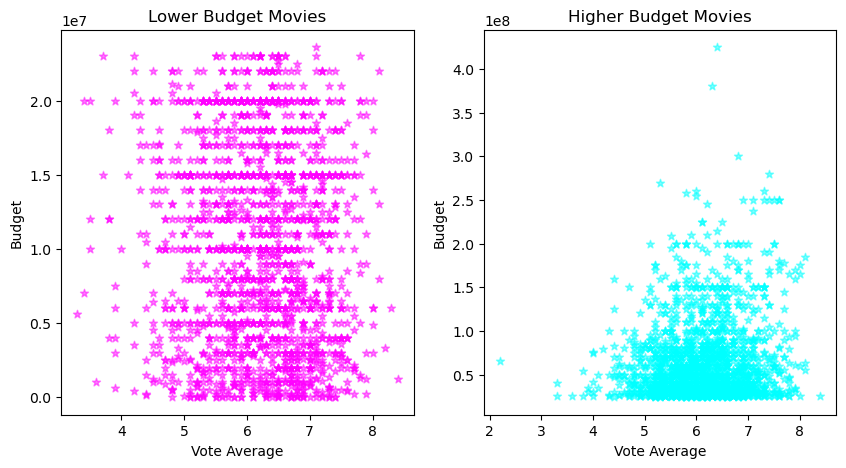

In [101]:
fig4, ax4 = plt.subplots(1, 2, figsize = (10, 5))
ax4[0].scatter (x = lower_budget_df['vote_average'],
            y = lower_budget_df['budget'], 
                label = 'Lower Budget Movies',
          color = 'magenta',
            marker = '*',
           alpha = .5)
ax4[1].scatter(x = upper_budget_df['vote_average'],
            y = upper_budget_df['budget'],
               label = 'Higher Budget Movies',
           color = 'aqua',
                marker = '*',
           alpha = .5)
ax4[0].set_xlabel('Vote Average')
ax4[0].set_ylabel('Budget')
ax4[1].set_xlabel('Vote Average')
ax4[1].set_ylabel('Budget')
ax4[0].set_title('Lower Budget Movies')
ax4[1].set_title('Higher Budget Movies')

plt.show()

Above shows scatter plots for the higher budget movies and lower budget movies. Each plot looks different. The lower budget movies show points all over the plot while the upper budget shows plots favoring one region. For the upper budget movies, the vote averages anywhere from 5-7. It is hard to tell with just the human eye of what the average is for the lower budget. It seems to be favoring the same range. 

In [102]:
lower_result = stats.pearsonr(lower_budget_df['vote_average'], lower_budget_df['budget'])

In [103]:
lower_result

PearsonRResult(statistic=-0.055508818224131305, pvalue=0.01822039520588371)

the p value for the lower budget movies is .018, which shows a strong corrleation. 

In [104]:
upper_result = stats.pearsonr(upper_budget_df['vote_average'], upper_budget_df['budget'])

In [105]:
upper_result

PearsonRResult(statistic=0.11357860119897722, pvalue=1.278265217311702e-06)

The p value for the upper budget movies is .000, which is also a strong correlation. 

Although both scatterplots show strong correlation between budget and vote average, we can conclude the higher budget plot is stronger. This is because the pvalue is smaller. 

From this analysis, many conclusions can be drawn from the provided data. First, in this dataset, the amount of movies produced increased per year. As the years went on, the number of movies grew. 


We can also conclude that upper budget movies recieve better ratings than lower budget movies. From the comparison of lower and upper budget movies, we can see that the plots looked very different. Although the plots looked very different, the pvalue of each plot showed strong correlation. The pvalue for the upper budget movies was smaller, therefore we can conclude upper budget movies recieve better rating than lower budget movies. 

Also, we can conclude that the duration of a movie has an affect on the revenue the movie brings in. In the plot above, it shows all movies plotted with duration on the x axis and revenue on the y axis. Although we cannot tell if there is a correlation just by looking at the plot, we can conclude from the p value there is a strong correlation between movie duration and revenue. 


Throughout the project and updates, I ran into a few issues that caused minor setbacks. There were a few things such as the timestamp and duplicates that took quite a bit of time to figure out. As I worked through my code and figured out the issues, mostly everything went smoothly. There are more things I wish I would of done such as more variety in my graphs and a deeper analysis into each question. 

From this project, the audience should be able to understand trends and patterns that are happening within the industry. This data can be used to predict trends, movie preformance, genre preference, cast/director preference etc. This data will also be able to explain what makes a movie successful in terms of ratings and popularity. This data will show different characteristics that contribute to the overall succes of a movie. This project will also show how much money a movie brings in verse the budget of the movie. Also, many questions can be answered from this project that can bring insight to the audience about the film-making industry and how decisions can be made off of data. 